### JSRT Data Introducton

JSRT는 Japanese Society of Radiological Technology 의 그룹으로써, 일본의 방사선 학회 그룹(?) 이라고 할 수 있습니다.

여기에서 흉부 엑스레이 데이터셋을 제공합니다, 데이터는 2048×2048 픽셀로 이루어져 있으며, 12비트의 이미지와 이미지 안에 헤더는 없습니다, 진단 훈련과 테스팅에 좋다고 합니다.

154개의 결절 사진과, 93개의 비-결절 사진으로 이루어져 있습니다 많은 정보를 밑에서 이야기할 텍스트 파일 안에 넣어놓았으며 환자 나이부터 시작해서 결절의 x, y 주소 등등을 가지고 있고, 질병명 또한 포함하고 있습니다 (그러나, 재 정렬이 조금 필요합니다. 뒤죽박죽이라서요...)

그리고 파일을 다운로드 할 수 있습니다, jsrt.or.jp 로 접속하여 데이터를 다운로드 할 수 있습니다. 이름과 이메일 주소 그리고 소속을 넣으면 그 이메일 주소로 자신이 지정했던 아이디와 함께 비밀번호를 보내줍니다. 그리고 그 아이디당 다운로드 할 수 있는 횟수는 열번으로 제한되어 있습니다

그리고 이미지가 IMG 이미지이기 때문에 보통적으로 우리가 볼 수 있는 이미지로 변환하려면 다음과 같은 스크립트를 사용하면 변환할 수 있습니다.

※ 여기에서는 파이썬으로 작업해보도록 하겠습니다

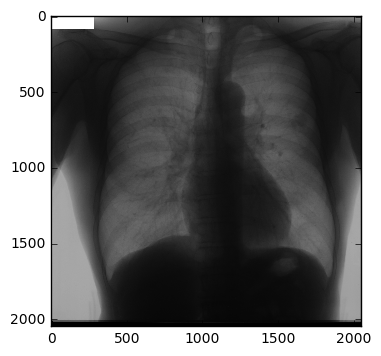

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 파라메터 값 지정
input_filename = "JPCLN001.IMG"
shape = (2048,2048) #사진 사이즈
dtype = np.dtype('>u2') #16비트를 Big-endican 값으로 표현하면
output_filename = "JPCLN001.PNG"

# 파일 읽기
fid = open(input_filename, 'rb')
data = np.fromfile(fid, dtype)
image = data.reshape(shape)

# 파일 출력하기
plt.imshow(image, cmap = "gray")
plt.savefig(output_filename)
plt.show()

### Let's Crack Textual Data!

```
JPCLN001.IMG, 5, 15, 53, male, 1634 692, malignant l.upper lobe, lung cancer	
JPCLN002.IMG, 5, 30, 78, female, 1614 1090, benign l.upper lobe(S5), pulmonary hematoma
JPCLN003.IMG, 5, 30, 63, female, 1303 447, malignant l.upper lobe(S1+2), lung cancer
```

먼저 공식 문서를 참고하였는데, 저들 학목에 대한 해석이 명확하지가 않아서 다시 해석을 해봐야 합니다.

### Cancer Informations.

1. Lung Cancer(폐암)

2. Pulmonary hematoma(폐 혈종)

3. Inflammatory	mass(염증성 암) **정확하지 않음, 리첵 필요**

4. Tuberculoma(결핵종)

5. Granuloma(육아종)

6. Hamartoma(양성 폐종양)

7. Cryptococcosis(호모균종, 호모균으로 인해서 폐에 장애가 오는 병)

8. susp. sclerosing hemangioma(경화혈관종)

9. Pneumonia(폐렴)

10. Metasis of colon cancer(대장암 - 폐암에서 전이)

11. Organizing pneumonia(기질화 폐렴)

### Additional Informations. 

- adenocarcinoma(선암)

- bronchioloalveolar cell carcinoma(세기관지폐포암)

- squamous cell carcinoma(편평상피암)

- small cell carcinoma(소세포암)